## Installing MLflow

In [ ]:
!pip install mlflow
#! pip install matplotlib
#! pip install seaborn
#! pip install sklearn


### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import mlflow
import mlflow.sklearn
from mlflow import log_metric, log_param, log_artifacts

### Read CSV 


In [2]:
titanic_df = pd.read_csv("Titanic+Data+Set.csv")

In [3]:
tdf1 = titanic_df.copy()

In [4]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

In [5]:
tdf1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Null Values
tdf1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# unnecessary columns
tdf1.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], inplace = True)

In [8]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [9]:
#tdf1.drop(columns=[1],inplace=True)
tdf1['Sex']=titanic_df['Sex']
#tdf1.head()

In [10]:
from sklearn.preprocessing import OneHotEncoder
OHE_sex = pd.get_dummies(tdf1['Sex'])
tdf1=tdf1.join(OHE_sex)
tdf1.drop('Sex',axis=1,inplace=True)
tdf1

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1
887,1,1,19.0,30.0000,1,0
888,0,3,NaN,23.4500,1,0
889,1,1,26.0,30.0000,0,1


In [11]:
tdf1.fillna(tdf1.Age.median(),inplace=True)
tdf1.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
female      0
male        0
dtype: int64

<AxesSubplot:>

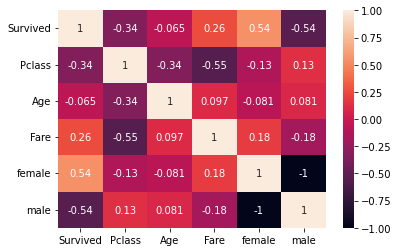

In [12]:
sns.heatmap(tdf1.corr(),annot=True)

In [ ]:
#tdf1.drop(columns=['male'], inplace = True)
#tdf1['Survived'] = titanic_df['Survived']
#target_df['Survived']=tdf1['Survived']
#target_df.head()
#tdf1.info()

In [13]:
tdf1 = tdf1.astype(int)
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int32
 1   Pclass    891 non-null    int32
 2   Age       891 non-null    int32
 3   Fare      891 non-null    int32
 4   female    891 non-null    int32
 5   male      891 non-null    int32
dtypes: int32(6)
memory usage: 21.0 KB


## Test Train Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tdf1.drop('Survived',axis=1),tdf1['Survived'],test_size=.25,random_state=42)


In [20]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [37]:
def run_model(model):
    mlflow.set_experiment(experiment_name='Titanic Models tracking')
    mlflow.autolog()
    
    model.fit(X_train,y_train)
    
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    return (model, train_accuracy)

In [38]:
model_RF = RandomForestClassifier(criterion='entropy',n_estimators=50,max_depth=5,max_samples=5)
#model_RF.fit(X_train,y_train)

#model_RF.score=round(model_RF.score(X_train,y_train)*100,2)

run_model(model_RF)

2022/06/14 21:54:14 INFO mlflow.tracking.fluent: Experiment with name 'Titanic Models tracking' does not exist. Creating a new experiment.
2022/06/14 21:54:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/14 21:54:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3293c0b1226f424281121aedb6c9f856', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


(RandomForestClassifier(criterion='entropy', max_depth=5, max_samples=5,
                        n_estimators=50),
 0.7559880239520959)

In [39]:
model2_RF = RandomForestClassifier(criterion='entropy',n_estimators=600,max_depth=5,max_samples=3)
#model2_RF.fit(X_train,y_train)
#model2_RF.score=round(model2_RF.score(X_train,y_train)*100,2)

run_model(model2_RF)

2022/06/14 21:54:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/14 21:54:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '77da4d429a33443a934f03e718a89309', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


(RandomForestClassifier(criterion='entropy', max_depth=5, max_samples=3,
                        n_estimators=600),
 0.7529940119760479)

In [40]:
model3_LogReg = sklearn.linear_model.LogisticRegression(n_jobs=2, random_state=47)
#model3_LogReg.fit(X_train,y_train)
#model3_LogReg.score=round(model3_LogReg.score(X_train,y_train)*100,2)

run_model(model3_LogReg)

2022/06/14 21:54:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/14 21:54:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e69a0136dee04c09a991a136e5d2f926', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


(LogisticRegression(n_jobs=2, random_state=47), 0.7964071856287425)